In [2]:
# all the libraries we used for this project

from pymongo import MongoClient
import pandas as pd
import numpy as np
import requests
import re
import bs4 as bs
import urllib
import itertools
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#the url of yelp that we will be using starting at page 1
source = urllib.request.urlopen('https://www.yelp.ca/search?find_desc=Restaurants&find_loc=Vancouver%2C%20BC&ns=1&start=0')

In [3]:
#passing on the html.parser to beautifulsoup
page_soup = bs.BeautifulSoup(source, 'html.parser')

In [4]:
#the info we want to scrape is divided into 2 parts: Main attributes & Secondary attributes
#main contains restaurant name, cuisine, rest rating, # of reviews, price
#secondary contains address, phone# and neighbourhood
mains = page_soup.find_all("div", 
{"class": "lemon--div__373c0__1mboc mainAttributes__373c0__1r0QA arrange-unit__373c0__o3tjT arrange-unit-fill__373c0__3Sfw1 border-color--default__373c0__3-ifU"})

In [12]:
#restaurant name is under the "a class". Ran code to do a quick test to see if we can scrape business name
main = mains[1]
name = main.find('a').text
print(name)

The Flying Pig - Yaletown


In [7]:
#using a for loop to print all restaurant names. We want to be able to debug quickly if we cant scrape the restaurant name.
#if we are unable to find a restaurant name, the code will print "none" allowing us to see which row the code went wrong.
#we were able to scrape all the names in page1
for main in mains:
    try:
        name = main.find('a').text
        print('rest name: '+ name)
    except:
        print(none)

rest name: Spicy 6 Fine Indian Cuisine
rest name: The Flying Pig - Yaletown
rest name: Fable
rest name: Tuc Craft Kitchen
rest name: Saku
rest name: The Flying Pig - Gastown
rest name: Guu with Garlic
rest name: Lunch Lady
rest name: Kokoro Tokyo Mazesoba
rest name: Dinesty Dumpling House
rest name: Phnom Penh
rest name: Chambar
rest name: Fanny Bay Oyster Bar & Shellfish Market
rest name: Blue Water Cafe
rest name: Elisa
rest name: Alibi Room
rest name: Miku
rest name: La Taqueria Pinche Taco Shop
rest name: Kingyo
rest name: So Hyang Korean Cuisine
rest name: Downlow Chicken Shack
rest name: Joe Fortes Seafood & Chop House
rest name: Saku
rest name: Tavola
rest name: Local Gastown
rest name: Rodney’s Oyster House
rest name: Yu Shang Hot Pot
rest name: ChiMec Fried Chicken & Burger
rest name: Zefferelli’s
rest name: ChongQing
rest name: Forage


In [7]:
#using a for loop to print all the cuisine type for restaurants. 
# same idea: we want to be able to debug quickly if we cant scrape the type of cuisine.
#if we are unable to find a cuisine type, the code will print "none" allowing us to see which row the code went wrong.
for main in mains:
    try:
        cuisine = main.find('a', {'class': 'lemon--a__373c0__IEZFH link__373c0__1G70M link-color--inherit__373c0__3dzpk link-size--default__373c0__7tls6'}).text
        print('Cuisine: '+ cuisine)
    except:
        print('none')

Cuisine: Coffee & Tea
Cuisine: Canadian (New)
Cuisine: Japanese
Cuisine: Canadian (New)
Cuisine: Canadian (New)
Cuisine: Vietnamese
Cuisine: Chinese
Cuisine: Cambodian
Cuisine: Japanese
Cuisine: Canadian (New)
Cuisine: Chicken Shop
Cuisine: Korean
Cuisine: Chicken Shop
Cuisine: Seafood
Cuisine: Asian Fusion
Cuisine: Japanese
Cuisine: Korean
Cuisine: Caribbean
Cuisine: Belgian
Cuisine: Burgers
Cuisine: Singaporean
Cuisine: Italian
Cuisine: Japanese
Cuisine: Vietnamese
Cuisine: Lebanese
Cuisine: Japanese
Cuisine: Indonesian
Cuisine: Canadian (New)
Cuisine: Korean
Cuisine: Japanese
Cuisine: Taiwanese


In [8]:
#using a for loop to print all the ratings for restaurants. 
# same idea: we want to be able to debug quickly if we cant scrape the ratings.
#if we are unable to find a rating, the code will print "none" allowing us to see which row the code went wrong.
#we were able to scrape all the ratings in page1
for main in mains:
    try:
        ratings = main.find('span', {'class': 'lemon--span__373c0__3997G display--inline__373c0__3JqBP border-color--default__373c0__3-ifU'}).div.get('aria-label')
        print('rest rating: '+ ratings)
    except:
        print('none')

none
rest rating: 4 star rating
rest rating: 4 star rating
rest rating: 4 star rating
rest rating: 4.5 star rating
rest rating: 4.5 star rating
rest rating: 4 star rating
rest rating: 4 star rating
rest rating: 4.5 star rating
rest rating: 4 star rating
rest rating: 4 star rating
rest rating: 4.5 star rating
rest rating: 4.5 star rating
rest rating: 4.5 star rating
rest rating: 4 star rating
rest rating: 4 star rating
rest rating: 4.5 star rating
rest rating: 4.5 star rating
rest rating: 4 star rating
rest rating: 5 star rating
rest rating: 4 star rating
rest rating: 4.5 star rating
rest rating: 4.5 star rating
rest rating: 4.5 star rating
rest rating: 5 star rating
rest rating: 4.5 star rating
rest rating: 4 star rating
rest rating: 4.5 star rating
rest rating: 4.5 star rating
rest rating: 3 star rating
rest rating: 5 star rating


In [9]:
#now for num reviews
for main in mains:
    try:
        reviews=(main.find("span", {"class": "lemon--span__373c0__3997G text__373c0__2Kxyz reviewCount__373c0__2r4xT text-color--black-extra-light__373c0__2OyzO text-align--left__373c0__2XGa-"}).text)
        print('Num of reviews: '+ reviews)
    except:
        print(None)

None
Num of reviews: 950
Num of reviews: 114
Num of reviews: 1095
Num of reviews: 676
Num of reviews: 10
Num of reviews: 776
Num of reviews: 1303
Num of reviews: 928
Num of reviews: 931
Num of reviews: 200
Num of reviews: 6
Num of reviews: 12
Num of reviews: 900
Num of reviews: 30
Num of reviews: 326
Num of reviews: 254
Num of reviews: 10
Num of reviews: 1347
Num of reviews: 11
Num of reviews: 70
Num of reviews: 337
Num of reviews: 836
Num of reviews: 28
Num of reviews: 190
Num of reviews: 1783
Num of reviews: 8
Num of reviews: 10
Num of reviews: 12
Num of reviews: 9
Num of reviews: 4


In [10]:
#and for price
#here, a result of none does not mean a bug in our code. From looking at the yelp page, a new restaurant will not have enough
#reviews to determine a price point. 
for main in mains:
    try:
        price=(main.find("span", {"class": "lemon--span__373c0__3997G text__373c0__2Kxyz priceRange__373c0__2DY87 text-color--black-extra-light__373c0__2OyzO text-align--left__373c0__2XGa- text-bullet--after__373c0__3fS1Z"}).text)
        print('Price: '+ price)
    except:
        print(None)

None
Price: $$
Price: $$
Price: $$
Price: $$
None
Price: $$
Price: $$
Price: $$
Price: $$
Price: $$
None
None
Price: $$$
None
Price: $$
Price: $$
None
Price: $$$
None
None
Price: $$$
Price: $$
None
Price: $
Price: $$$
None
None
None
None
None


In [ ]:
####### change
#the following is the list of classes we used for secondary attributes
#secondary attribute class
<div class="lemon--div__373c0__1mboc secondaryAttributes__373c0__7bA0w arrange-unit__373c0__o3tjT border-color--default__373c0__3-ifU"><div class="lemon--div__373c0__1mboc padding-l2__373c0__1Dr82 border-color--default__373c0__3-ifU text-align--right__373c0__1XDu3"><div class="lemon--div__373c0__1mboc border-color--default__373c0__3-ifU"><div class="lemon--div__373c0__1mboc display--inline-block__373c0__1ZKqC border-color--default__373c0__3-ifU"><div class="lemon--div__373c0__1mboc border-color--default__373c0__3-ifU"><p class="lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO">(604) 568-1344</p></div></div></div><address class="lemon--address__373c0__2sPac"><div class="lemon--div__373c0__1mboc border-color--default__373c0__3-ifU"><div class="lemon--div__373c0__1mboc display--inline-block__373c0__1ZKqC border-color--default__373c0__3-ifU"><div class="lemon--div__373c0__1mboc border-color--default__373c0__3-ifU"><p class="lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO"><span class="lemon--span__373c0__3997G raw__373c0__3rcx7">1168 Hamilton Street</span></p></div></div></div></address><div class="lemon--div__373c0__1mboc margin-b1__373c0__1khoT border-color--default__373c0__3-ifU"><div class="lemon--div__373c0__1mboc border-color--default__373c0__3-ifU"><div class="lemon--div__373c0__1mboc display--inline-block__373c0__1ZKqC border-color--default__373c0__3-ifU"><div class="lemon--div__373c0__1mboc border-color--default__373c0__3-ifU"><p class="lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO">Yaletown</p></div></div></div></div></div></div>
#address class
<span class="lemon--span__373c0__3997G raw__373c0__3rcx7">1168 Hamilton Street</span>

#phone class
<p class="lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO">(604) 568-1344</p>

#neighbourhood class
<p class="lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO">Yaletown</p>

In [21]:
#secondary attributes
second = page_soup.find_all("div", {"class":"lemon--div__373c0__1mboc secondaryAttributes__373c0__7bA0w arrange-unit__373c0__o3tjT border-color--default__373c0__3-ifU"})

In [72]:
# cant scrape for neighbourhood
for sec in second:
    try:
        neigh = sec.find("p" , {"class": "lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO"}).get_text()
        print('Neighbourhood: '+ neigh)
    except: 
        print(None)

Neighbourhood: (604) 566-9666
Neighbourhood: (604) 568-4554
Neighbourhood: (604) 872-2868
Neighbourhood: (778) 955-9135
Neighbourhood: (604) 252-3957
Neighbourhood: (604) 568-8971
Neighbourhood: (604) 737-1000
Neighbourhood: (604) 558-3287
Neighbourhood: (604) 258-0005
Neighbourhood: (604) 620-1175
Neighbourhood: (604) 873-1441
Neighbourhood: (604) 569-8192
Neighbourhood: (778) 246-1199
Neighbourhood: (778) 896-4200
Neighbourhood: (604) 565-3355
Neighbourhood: (604) 253-2986
Neighbourhood: (604) 720-9604
Neighbourhood: 1260 Commercial Drive
Neighbourhood: (604) 336-9266
Neighbourhood: (604) 336-9822
Neighbourhood: (604) 569-2278
Neighbourhood: (604) 224-1912
Neighbourhood: (604) 255-4155
Neighbourhood: (604) 559-6878
Neighbourhood: (604) 568-4351
Neighbourhood: (604) 873-3131
Neighbourhood: (604) 620-2500
Neighbourhood: (604) 734-2818
Neighbourhood: (604) 677-4247
Neighbourhood: (604) 221-7777
Neighbourhood: (604) 875-6246


In [13]:
#neighbourhood class
# there is problem with neighbourhood class. The class contains info for phone #, address, and neighbourhood.
#we will have to filter out neighbourhood and remove unwanted items
[item.get_text() for item in page_soup.find_all('p', class_ =
'lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO')]

['(604) 609-9999',
 '1184 Denman Street',
 'West End',
 '(604) 568-1344',
 '1168 Hamilton Street',
 'Yaletown',
 '548 W Broadway',
 'Fairview Slopes',
 '(604) 559-8999',
 '60 W Cordova Street',
 'Gastown',
 '(604) 732-1322',
 '1944 W 4th Avenue',
 'Kitsilano',
 '(604) 559-5938',
 '1046 Commercial Drive',
 'Grandview-Woodlands',
 '(604) 559-7968',
 '102 Water Street',
 'Gastown',
 '(604) 669-7769',
 '1719 Robson Street',
 'West End',
 '(604) 428-8414',
 '1128 Robson Street',
 'West End',
 '(604) 682-5777',
 '244 E Georgia Street',
 'Strathcona',
 '(604) 688-8078',
 '1095 Hamilton St',
 'Yaletown',
 '(604) 331-0058',
 '835 Denman St',
 'West End',
 '(604) 685-8678',
 '1698 Robson Street',
 'West End',
 '(604) 283-1385',
 '905 Commercial Drive',
 'Grandview-Woodlands',
 '(604) 428-7722',
 '774 Denman Street',
 'West End',
 '(604) 559-8872',
 '551 Seymour Street',
 'Downtown',
 '(604) 362-5443',
 '1109 Hamilton Street',
 'Yaletown',
 '(604) 729-0702',
 '6345 Fraser Street',
 'Sunset',
 '(6

In [14]:
n = [item.get_text() for item in page_soup.find_all('p', class_ = 'lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO')]
#n1 to change phone num and address to None
n1 = [x if (bool(re.search(r'\d+', x)) == False) else "None" for x in n]
n1

['None',
 'None',
 'West End',
 'None',
 'None',
 'Yaletown',
 'None',
 'Fairview Slopes',
 'None',
 'None',
 'Gastown',
 'None',
 'None',
 'Kitsilano',
 'None',
 'None',
 'Grandview-Woodlands',
 'None',
 'None',
 'Gastown',
 'None',
 'None',
 'West End',
 'None',
 'None',
 'West End',
 'None',
 'None',
 'Strathcona',
 'None',
 'None',
 'Yaletown',
 'None',
 'None',
 'West End',
 'None',
 'None',
 'West End',
 'None',
 'None',
 'Grandview-Woodlands',
 'None',
 'None',
 'West End',
 'None',
 'None',
 'Downtown',
 'None',
 'None',
 'Yaletown',
 'None',
 'None',
 'Sunset',
 'None',
 'None',
 'Renfrew-Collingwood',
 'None',
 'None',
 'Downtown',
 'None',
 'Kitsilano',
 'None',
 'None',
 'Kensington-Cedar Cottage',
 'None',
 'None',
 'West End',
 'None',
 'None',
 'West End',
 'None',
 'None',
 'Kensington-Cedar Cottage',
 'None',
 'None',
 'Granville Entertainment District',
 'None',
 'None',
 'Downtown',
 'None',
 'None',
 'Downtown',
 'None',
 'None',
 'Kitsilano',
 'None',
 'None',
 'Mo

In [19]:
n = [item.get_text() for item in page_soup.find_all('p', class_ = 'lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO')]
#n1 to change phone num and address to None
n1 = [x if (bool(re.search(r'\d+', x)) == False) else "None" for x in n]
n2 = list(filter(lambda x: x != 'None', n1))
n2

['West End',
 'Yaletown',
 'Fairview Slopes',
 'Gastown',
 'Kitsilano',
 'Grandview-Woodlands',
 'Gastown',
 'West End',
 'West End',
 'Strathcona',
 'Yaletown',
 'West End',
 'West End',
 'Grandview-Woodlands',
 'West End',
 'Downtown',
 'Yaletown',
 'Sunset',
 'Renfrew-Collingwood',
 'Downtown',
 'Kitsilano',
 'Kensington-Cedar Cottage',
 'West End',
 'West End',
 'Kensington-Cedar Cottage',
 'Granville Entertainment District',
 'Downtown',
 'Downtown',
 'Kitsilano',
 'Mount Pleasant',
 'Marpole']

In [17]:
#same idea as before, now for secondary attributes. Find class + tag and scrape data
#run for loop to obtain addresses
for sec in second:
    try:
        address = sec.find("span", {"class": "lemon--span__373c0__3997G raw__373c0__3rcx7"}).text
        print('Address: '+ address)
    except:
        print(None)

Address: 1116 Robson Street
Address: 548 W Broadway
Address: 1168 Hamilton Street
Address: 60 W Cordova Street
Address: 102 Water Street
Address: 1944 W 4th Avenue
Address: 1698 Robson Street
Address: 1046 Commercial Drive
Address: 762 Cambie St
Address: 1719 Robson Street
Address: 200 Granville Street
Address: 1095 Hamilton St
Address: 551 Seymour Street
Address: 871 Denman Street
Address: 1109 Hamilton Street
Address: 568 Beatty Street
Address: 244 E Georgia Street
Address: 6345 Fraser Street
Address: 835 Denman St
Address: 157 Alexander Street
Address: 1829 Robson Street
Address: 1127 Mainland Street
Address: Located in The Listel Hotel
Address: 2450 Yukon Street
Address: 905 Commercial Drive
Address: 774 Denman Street
Address: 1128 Robson Street
Address: 777 Thurlow Street
Address: 1136 Robson Street
Address: 2340 W 4th Avenue
Address: 3 Alexander Street


In [22]:
# for loop to obtain tel#
#some phone# werent in the right tags and classes, will have to manually remove and filter after
tel = []
for sec in second:
    try:
        tel.append(sec.find("p" , {"class": "lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO"}).get_text())
    except: 
        tel.append("None")

In [23]:
tel

['(604) 609-9999',
 '(604) 568-1344',
 '548 W Broadway',
 '(604) 559-8999',
 '(604) 732-1322',
 '(604) 559-5938',
 '(604) 559-7968',
 '(604) 669-7769',
 '(604) 428-8414',
 '(604) 682-5777',
 '(604) 688-8078',
 '(604) 331-0058',
 '(604) 685-8678',
 '(604) 283-1385',
 '(604) 428-7722',
 '(604) 559-8872',
 '(604) 362-5443',
 '(604) 729-0702',
 '(604) 434-0526',
 '(604) 879-7119',
 '2287 West Broadway',
 '(604) 423-3838',
 '(604) 606-4680',
 '(604) 608-1677',
 '(778) 988-9257',
 '(604) 440-4402',
 '(604) 568-3900',
 '(604) 620-6800',
 '(604) 714-0233',
 '(604) 879-4400',
 '(604) 336-9163']

In [26]:
#regex to filter proper phone#s
new_tel = [x if (bool(re.search(r'[0-9]{10}|[0-9]{3}-[0-9]{3}-[0-9]{4}|\([0-9]{3}\)[0-9]{3}-[0-9]{4}|\(\d\d\d\)\s\d\d\d-\d\d\d\d', x)) == True) else "None" for x in tel]
new_tel

['(604) 609-9999',
 '(604) 568-1344',
 'None',
 '(604) 559-8999',
 '(604) 732-1322',
 '(604) 559-5938',
 '(604) 559-7968',
 '(604) 669-7769',
 '(604) 428-8414',
 '(604) 682-5777',
 '(604) 688-8078',
 '(604) 331-0058',
 '(604) 685-8678',
 '(604) 283-1385',
 '(604) 428-7722',
 '(604) 559-8872',
 '(604) 362-5443',
 '(604) 729-0702',
 '(604) 434-0526',
 '(604) 879-7119',
 'None',
 '(604) 423-3838',
 '(604) 606-4680',
 '(604) 608-1677',
 '(778) 988-9257',
 '(604) 440-4402',
 '(604) 568-3900',
 '(604) 620-6800',
 '(604) 714-0233',
 '(604) 879-4400',
 '(604) 336-9163']

In [27]:
#appending everything to a list
name = []
cuisine = []
ratings = []
reviews = []
price = []
add = []
tel = []
#dont need list for neighbourhood because it is already in a list

In [28]:
for main in mains:
    try:
        name.append(main.find('a').text)
    except:
        name.append('none')
    try:
        cuisine.append(main.find('a', {'class': 'lemon--a__373c0__IEZFH link__373c0__1G70M link-color--inherit__373c0__3dzpk link-size--default__373c0__7tls6'}).text)
    except:
        cuisine.append('none')
    try:
        ratings.append(main.find('span', {'class': 'lemon--span__373c0__3997G display--inline__373c0__3JqBP border-color--default__373c0__3-ifU'}).div.get('aria-label'))
    except:
        ratings.append('none')
    try:
        reviews.append(main.find("span", {"class": "lemon--span__373c0__3997G text__373c0__2Kxyz reviewCount__373c0__2r4xT text-color--black-extra-light__373c0__2OyzO text-align--left__373c0__2XGa-"}).text)
    except:
        reviews.append('none')
    try:
        price.append(main.find("span", {"class": "lemon--span__373c0__3997G text__373c0__2Kxyz priceRange__373c0__2DY87 text-color--black-extra-light__373c0__2OyzO text-align--left__373c0__2XGa- text-bullet--after__373c0__3fS1Z"}).text)
    except:
        price.append('none')

In [29]:
#just combining all the loops together for secondary attributes
for sec in second:
    try:       
        add.append(sec.find("span", {"class": "lemon--span__373c0__3997G raw__373c0__3rcx7"}).text)
    except:
        add.append("None")
    try:
        tel.append(sec.find("p" , {"class": "lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO"}).get_text())
    except: 
        tel.append("None")
        
n = [item.get_text() for item in page_soup.find_all('p', class_ = 'lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO')]
n1 = [x if (bool(re.search(r'\d+', x)) == False) else "None" for x in n]
n2 = list(filter(lambda x: x != 'None', n1))
new_tel = [x if (bool(re.search(r'[0-9]{10}|[0-9]{3}-[0-9]{3}-[0-9]{4}|\([0-9]{3}\)[0-9]{3}-[0-9]{4}|\(\d\d\d\)\s\d\d\d-\d\d\d\d', x)) == True) else "None" for x in tel]            

In [32]:
#combining everything to a dataframe
data = {}
#giving values
data = {'Restaurant_Name': name, 'Cuisine': cuisine, 'Restaurant_Ratings': ratings, 'Restaurant_Reviews': reviews, 
        'Restaurant_Price': price, 'Restaurant_Address': add, 'Restaurant_Telephone': new_tel, 'Neighbourhood': n2}
rest = pd.DataFrame(data)
#giving headers for our csv output if needed
header = ["Restaurant_Name", "Cuisine", "Restaurant_Ratings", "Restaurant_Reviews", "Restaurant_Price", "Restaurant_Address", "Restaurant_Telephone", "Neighbourhood"]
#extra line to convert dataframe to an csv file if needed:
#rest.to_csv("Output.csv", columns = header)

In [33]:
rest

,Restaurant_Name,Cuisine,Restaurant_Ratings,Restaurant_Reviews,Restaurant_Price,Restaurant_Address,Restaurant_Telephone,Neighbourhood
0,Beeryani Indian Bistro & Bar,Indian,5 star rating,10,none,1184 Denman Street,(604) 609-9999,West End
1,The Flying Pig - Yaletown,Canadian (New),4 star rating,1095,$$,1168 Hamilton Street,(604) 568-1344,Yaletown
2,Saku,Japanese,4.5 star rating,116,$$,548 W Broadway,None,Fairview Slopes
3,Tuc Craft Kitchen,Canadian (New),4 star rating,950,$$,60 W Cordova Street,(604) 559-8999,Gastown
4,Fable,Canadian (New),4.5 star rating,676,$$,1944 W 4th Avenue,(604) 732-1322,Kitsilano
5,Lunch Lady,Vietnamese,4.5 star rating,10,none,1046 Commercial Drive,(604) 559-5938,Grandview-Woodlands
6,The Flying Pig - Gastown,Canadian (New),4 star rating,932,$$,102 Water Street,(604) 559-7968,Gastown
7,Dinesty Dumpling House,Chinese,4 star rating,777,$$,1719 Robson Street,(604) 669-7769,West End
8,Kosoo,Korean,4.5 star rating,6,none,1128 Robson Street,(604) 428-8414,West End
9,Phnom Penh,Cambodian,4 star rating,1303,$$,244 E Georgia Street,(604) 682-5777,Strathcona


In [35]:
###### change

#Now, for multi page scrapping. 
#Defined a quick function for BeautifulSoup using codes from prior: 
def make_soup(url):
    source = urllib.request.urlopen(url)
    page_soup = bs.BeautifulSoup(source, 'html.parser')
    return page_soup

Yelp Url for page one:
https://www.yelp.ca/search?find_desc=Restaurants&find_loc=Vancouver%2C%20BC&ns=1&start=0

Page 2: https://www.yelp.ca/search?find_desc=Restaurants&find_loc=Vancouver%2C%20BC&ns=1&start=30

Page 3: https://www.yelp.ca/search?find_desc=Restaurants&find_loc=Vancouver%2C%20BC&ns=1&start=60

The pattern is that the ending jumps by 30. We created a quick for loop to scrape multiple pages at a time: 

In [74]:
for x in range(0, 211, 30):
    print(x)

0
30
60
90
120
150
180
210


In [36]:
#had issue with length of neighbourhood not being the same as the other lists
#realized that neighbourhood was a nested list
#had to un-nest the list to make all the list the same length
neigh = []
for i in range(0, 31, 30): #only scrapping 2 pages for our example
    soup = make_soup('https://www.yelp.ca/search?find_desc=Restaurants&find_loc=Vancouver%2C%20BC&ns=1&start=' + str(i))
    n = [item.get_text() for item in soup.find_all('p', class_ = 'lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO')]
    n1 = [x if (bool(re.search(r'\d+', x)) == False) else "None" for x in n]
    n2 = list(filter(lambda x: x != 'None', n1))
    neigh.append(n2)

In [45]:
print(neigh, len(neigh))

[['Mount Pleasant', 'Yaletown', 'Fairview Slopes', 'Gastown', 'Kitsilano', 'Grandview-Woodlands', 'Gastown', 'West End', 'West End', 'Strathcona', 'West End', 'West End', 'Grandview-Woodlands', 'West End', 'Yaletown', 'Downtown', 'Yaletown', 'Sunset', 'Renfrew-Collingwood', 'Downtown', 'Kitsilano', 'Kensington-Cedar Cottage', 'West End', 'West End', 'Kensington-Cedar Cottage', 'Granville Entertainment District', 'Downtown', 'Downtown', 'Kitsilano', 'Mount Pleasant', 'Marpole'], ['Mount Pleasant', 'West End', 'Downtown', 'Riley Park', 'Kitsilano', 'Chinatown', 'Kitsilano', 'West End', 'Downtown Eastside', 'Fairview Slopes', 'West End', 'Yaletown', 'Granville Entertainment District', 'Sunset', 'Chinatown', 'Marpole', 'Hastings-Sunrise', 'West End', 'Coal Harbour', 'The Drive', 'Riley Park', 'South Cambie', 'Arbutus Ridge', 'Chinatown', 'West End', 'Hastings-Sunrise', 'Downtown', 'West End', 'Oakridge', 'Mount Pleasant']] 2


In [44]:
flat  = list(itertools.chain(*neigh))
len(flat)

61

itertools.chain(*iterables)
Make an iterator that returns elements from the first iterable until it is exhausted, then proceeds to the next iterable, until all of the iterables are exhausted. Used for treating consecutive sequences as a single sequence. Roughly equivalent to:

def chain(*iterables):
    # chain('ABC', 'DEF') --> A B C D E F
    for it in iterables:
        for element in it:
            yield element

In [48]:
# multi page scrapping to CSV output

name = []
cuisine = []
ratings = []
reviews = []
price = []
add = []
tel = []
neigh = []

for i in range(0, 211, 30):
    soup = make_soup('https://www.yelp.ca/search?find_desc=Restaurants&find_loc=Vancouver%2C%20BC&ns=1&start=' + str(i))
    mains = soup.find_all("div", {"class": "lemon--div__373c0__1mboc mainAttributes__373c0__1r0QA arrange-unit__373c0__o3tjT arrange-unit-fill__373c0__3Sfw1 border-color--default__373c0__3-ifU"})
    second = soup.find_all("div", {"class":"lemon--div__373c0__1mboc secondaryAttributes__373c0__7bA0w arrange-unit__373c0__o3tjT border-color--default__373c0__3-ifU"})
    for main in mains:
        try:
            name.append(main.find('a').text)
        except:
            name.append('none')
        try:
            cuisine.append(main.find('a', {'class': 'lemon--a__373c0__IEZFH link__373c0__1G70M link-color--inherit__373c0__3dzpk link-size--default__373c0__7tls6'}).text)
        except:
            print('none')
        try:
            ratings.append(main.find('span', {'class': 'lemon--span__373c0__3997G display--inline__373c0__3JqBP border-color--default__373c0__3-ifU'}).div.get('aria-label'))
        except:
            ratings.append('none')
        try:
            reviews.append(main.find("span", {"class": "lemon--span__373c0__3997G text__373c0__2Kxyz reviewCount__373c0__2r4xT text-color--black-extra-light__373c0__2OyzO text-align--left__373c0__2XGa-"}).text)
        except:
            reviews.append('none')
        try:
            price.append(main.find("span", {"class": "lemon--span__373c0__3997G text__373c0__2Kxyz priceRange__373c0__2DY87 text-color--black-extra-light__373c0__2OyzO text-align--left__373c0__2XGa- text-bullet--after__373c0__3fS1Z"}).text)
        except:
            price.append('none')

    for sec in second:
        try:       
            add.append(sec.address.find("p", {"class": "lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO"}).text)
        except:
            add.append("None")
        try:
            tel.append(sec.div.div.text)
        except: 
            tel.append("None")
    n = [item.get_text() for item in soup.find_all('p', class_ = 'lemon--p__373c0__3Qnnj text__373c0__2Kxyz text-color--black-extra-light__373c0__2OyzO text-align--right__373c0__1f0KI text-size--small__373c0__3NVWO')]
    n1 = [x if (bool(re.search(r'\d+', x)) == False) else "None" for x in n]
    n2 = list(filter(lambda x: x != 'None', n1))
    neigh.append(n2)
    new_tel = [x if (bool(re.search(r'[0-9]{10}|[0-9]{3}-[0-9]{3}-[0-9]{4}|\([0-9]{3}\)[0-9]{3}-[0-9]{4}|\(\d\d\d\)\s\d\d\d-\d\d\d\d', x)) == True) else "None" for x in tel]

flat  = list(itertools.chain(*neigh))
data = {}
data = {'Restaurant_Name': name, 'Cuisine': cuisine, 'Restaurant_Ratings': ratings, 'Restaurant_Reviews': reviews, 
        'Restaurant_Price': price, 'Restaurant_Address': add, 'Restaurant_Telephone': new_tel, 'Neighbourhood': flat[0:248]}
rest = pd.DataFrame(data)
header = ["Restaurant_Name", "Cuisine", "Restaurant_Ratings", "Restaurant_Reviews", "Restaurant_Price", "Restaurant_Address", "Restaurant_Telephone", "Neighbourhood"]
rest.to_csv("ProjectFinal.csv", columns = header)

In [49]:
client = MongoClient('localhost',27017)
yelp = client.rest_db.rest_table

In [50]:
rest.reset_index(inplace=True)
rest_dict = rest.to_dict("records")

In [51]:
yelp.insert_many(rest_dict)

In [52]:
rest.shape

(248, 9)

In [6]:
df=pd.read_csv('ProjectFinal.csv')

In [7]:
df.dtypes

Unnamed: 0               int64
Restaurant_Name         object
Cuisine                 object
Restaurant_Ratings      object
Restaurant_Reviews      object
Restaurant_Price        object
Restaurant_Address      object
Restaurant_Telephone    object
Neighbourhood           object
dtype: object

In [8]:
df['Restaurant_Reviews'].unique()

array(['none', '1095', '116', '950', '676', '10', '932', '777', '6',
       '1303', '15', '930', '201', '31', '902', '326', '102', '254',
       '1349', '11', '70', '336', '836', '28', '190', '1785', '12', '9',
       '4', '205', '184', '562', '14', '60', '371', '283', '1020', '432',
       '52', '170', '428', '3', '22', '37', '35', '7', '505', '460',
       '325', '13', '97', '155', '364', '96', '986', '18', '445', '537',
       '730', '134', '2', '214', '26', '449', '724', '421', '20', '344',
       '2282', '632', '8', '33', '146', '455', '1', '82', '16', '93',
       '128', '147', '355', '297', '275', '62', '17', '75', '380', '569',
       '681', '21', '194', '19', '249', '40', '1029', '282', '90', '738',
       '211', '27', '609', '53', '113', '104', '392', '46', '693', '29',
       '1067', '47', '678', '25', '167', '185', '61', '99', '271', '196',
       '209', '182', '187', '294', '181', '248', '488', '42', '140',
       '138', '5', '324', '272', '423', '84', '346', '491', '197',

In [9]:
df['Restaurant_Reviews']=df['Restaurant_Reviews'].replace('none',0)

In [10]:
df['Restaurant_Reviews'].unique()

array([0, '1095', '116', '950', '676', '10', '932', '777', '6', '1303',
       '15', '930', '201', '31', '902', '326', '102', '254', '1349', '11',
       '70', '336', '836', '28', '190', '1785', '12', '9', '4', '205',
       '184', '562', '14', '60', '371', '283', '1020', '432', '52', '170',
       '428', '3', '22', '37', '35', '7', '505', '460', '325', '13', '97',
       '155', '364', '96', '986', '18', '445', '537', '730', '134', '2',
       '214', '26', '449', '724', '421', '20', '344', '2282', '632', '8',
       '33', '146', '455', '1', '82', '16', '93', '128', '147', '355',
       '297', '275', '62', '17', '75', '380', '569', '681', '21', '194',
       '19', '249', '40', '1029', '282', '90', '738', '211', '27', '609',
       '53', '113', '104', '392', '46', '693', '29', '1067', '47', '678',
       '25', '167', '185', '61', '99', '271', '196', '209', '182', '187',
       '294', '181', '248', '488', '42', '140', '138', '5', '324', '272',
       '423', '84', '346', '491', '197', '171

In [11]:
df['Restaurant_Reviews']=df['Restaurant_Reviews'].astype('int')

In [12]:
df.dtypes

Unnamed: 0               int64
Restaurant_Name         object
Cuisine                 object
Restaurant_Ratings      object
Restaurant_Reviews       int32
Restaurant_Price        object
Restaurant_Address      object
Restaurant_Telephone    object
Neighbourhood           object
dtype: object

In [56]:
re=df.groupby('Restaurant_Name').sum()['Restaurant_Reviews'].sort_values(ascending=False).head(5)
re

Restaurant_Name
Medina Cafe    2282
Miku           1785
Japadog        1716
Chambar        1349
Phnom Penh     1303
Name: Restaurant_Reviews, dtype: int32

In [58]:
re.sort_values(inplace=True)

Text(0.5, 1.0, 'Top 5 Popular Resturants by Reviews')

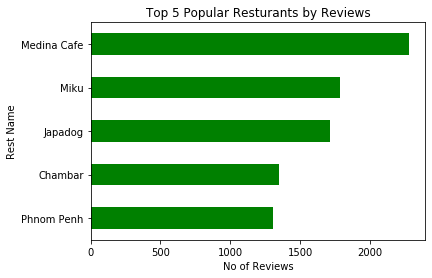

In [59]:
re.plot(kind='barh',color='green')
plt.xlabel("No of Reviews")
plt.ylabel("Rest Name")
plt.title("Top 5 Popular Resturants by Reviews")

In [23]:
Top5Neigh=df['Neighbourhood'].value_counts().head(5)
Top5Neigh

West End                    40
Downtown                    36
Kitsilano                   20
Mount Pleasant              19
Kensington-Cedar Cottage    14
Name: Neighbourhood, dtype: int64

In [25]:
Top5Neigh.sort_values(inplace=True)

Text(0.5, 1.0, 'Top 5 Neighbourhoods by No of Resturants')

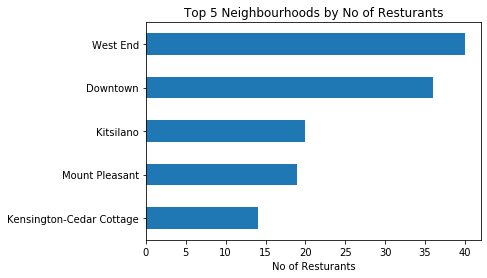

In [27]:
Top5Neigh.plot(kind='barh')
plt.xlabel("No of Resturants")
plt.title("Top 5 Neighbourhoods by No of Resturants")

In [30]:
top5cuisine=df['Cuisine'].value_counts().head(5)
top5cuisine

Korean        19
Chinese       16
Italian       15
Japanese      15
Vietnamese    14
Name: Cuisine, dtype: int64

In [33]:
top5cuisine.sort_values(inplace=True)

Text(0.5, 1.0, 'Top 5 Cuisines in Vancouver')

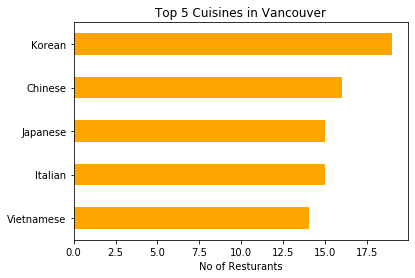

In [36]:
top5cuisine.plot(kind='barh',color='orange')
plt.xlabel("No of Resturants")
plt.title("Top 5 Cuisines in Vancouver")

In [39]:
rat=df.groupby('Restaurant_Ratings').mean()['Restaurant_Reviews'].sort_values(ascending=False).head()
rat

Restaurant_Ratings
4 star rating      285.977612
4.5 star rating    192.223684
3.5 star rating    148.176471
5 star rating       27.250000
3 star rating       23.333333
Name: Restaurant_Reviews, dtype: float64

Text(0.5, 1.0, ' Avg No of Reviews by Ratings')

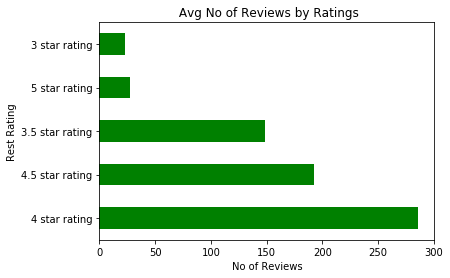

In [61]:
rat.plot(kind='barh',color='green')
plt.xlabel("No of Reviews")
plt.ylabel("Rest Rating")
plt.title(" Avg No of Reviews by Ratings")

In [43]:
labels=[{'4 star':'286'},{'4.5star':'192'},{'3.5 star':'148'},{'3star':'23'},{'5 star':'27'}]

Text(0.5, 1.0, 'Average No of Reviews by Ratings')

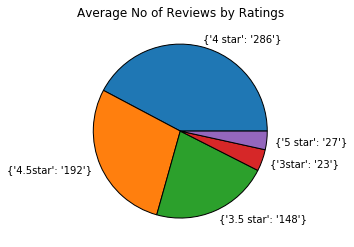

In [60]:
plt.pie(rat, labels=labels ,wedgeprops={'edgecolor':'black'})
plt.title("Average No of Reviews by Ratings")

Text(0, 0.5, 'Rest Ratings')

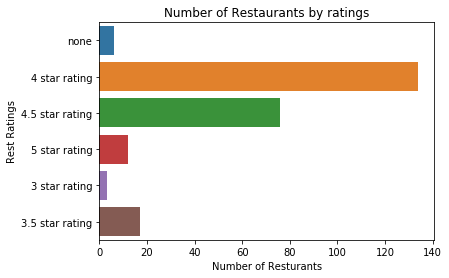

In [46]:
sns.countplot(y='Restaurant_Ratings',data=df,orient="v")
plt.title("Number of Restaurants by ratings")
plt.xlabel("Number of Resturants")
plt.ylabel("Rest Ratings")

In [48]:
rest=df.groupby('Restaurant_Name').count()
rest

,Unnamed: 0,Cuisine,Restaurant_Ratings,Restaurant_Reviews,Restaurant_Price,Restaurant_Address,Restaurant_Telephone,Neighbourhood
Restaurant_Name,,,,,,,,
Absinthe Bistro,1,1,1,1,1,1,1,1
Afghan Horsemen Restaurant,1,1,1,1,1,1,1,1
Ajs Brooklyn Pizza Joint,1,1,1,1,1,1,1,1
Aleph Eatery,1,1,1,1,1,1,1,1
Alibi Room,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
Z&W Shanghai,1,1,1,1,1,1,1,1
Zaatar W Zeit,1,1,1,1,1,1,1,1
ZamZam,1,1,1,1,1,1,1,1


Text(0.5, 1.0, 'Count of Restaurants by Number of outlets')

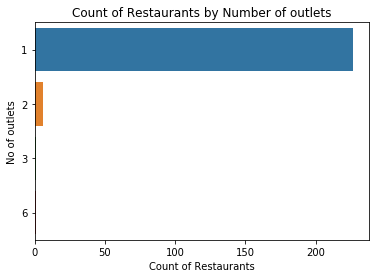

In [50]:
sns.countplot(y='Restaurant_Ratings',data=rest)
plt.xlabel("Count of Restaurants")
plt.ylabel("No of outlets")
plt.title("Count of Restaurants by Number of outlets")